# **Создадим свою cверточную нейронную сеть (Convolutional Neural Networks) - CNN**

### Загрузка данных


In [ ]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image

# Для отрисовки графиков
import matplotlib.pyplot as plt

# Для генерации случайных чисел
import random

# Библиотека работы с массивами
import numpy as np

# Для работы с файлами
import os

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam

# модуль для отсчета времени
import time

import zipfile

In [ ]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Путь к архивному файлу
file_path = '/content/gdrive/MyDrive/Paintings.zip'

# Путь к директории, в которую нужно разархивировать файл
extract_path = '/content/'

In [ ]:
# Разархивирование файла
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/Paintings/'

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH)

['Kandinsky', 'Repin', 'Kustodiev', 'Levitan']

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 4, метки классов: ['Kandinsky', 'Kustodiev', 'Levitan', 'Repin']


In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Kandinsky : ['2087074530.jpg', '1242979119.jpg', '1205040415.jpg', '1188778130.jpg', '133524663.jpg', '1968743725.jpg', '1136629908.jpg', '910845391.jpg', '1162965260.jpg', '745867129.jpg', '1267394244.jpg', '1872748037.jpg', '919507662.jpg', '1062831123.jpg', '1067571410.jpg', '2001583460.jpg', '188755666.jpg', '1720364744.jpg']
Kustodiev : ['135470621.jpg', '1345443546.jpg', '1529748000.jpg', '1982717504.jpg', '1163126897.jpg', '1680008116.webp', '2135705189.jpg', '24666530.jpg', '991114206.jpg', '585323452.jpg', '2121418380.jpg', '1866793083.jpg', '4155.jpg', '1021812299.jpg', '23254472.jpg', '1724981648.jpg', '1176592730.jpg', '312602004.jpg', '1405400461.jpg']
Levitan : ['369934082.jpg', '168197631.jpg', '873300170.jpg', '754318237.jpg', '240075683.jpg', '669860839.jpg', '642944335.jpg', '741052246.jpg', '733691406.jpg', '853662109.jpg', '640197753.jpg', '870718383.jpg', '131311035.jpg', '884368896.jpg', '592929077.jpg', '628277587.jpg', '845010375.jpg', '733197021.jpg']
Repin : [

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `.imshow()` из модуля `matplotlib.pyplot`):

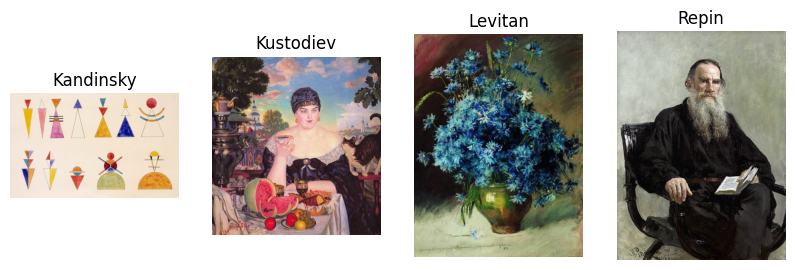

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Kandinsky составляет 18 фото
Размер класса Kustodiev составляет 19 фото
Размер класса Levitan составляет 18 фото
Размер класса Repin составляет 18 фото

Общий размер базы для обучения: 73


In [ ]:
from sklearn.utils import shuffle
data_files, data_labels = shuffle(data_files, data_labels, random_state=0)

**очень маленькая база**

In [ ]:
# некоторая выборка
print('Пути к файлам: ', data_files[2:18])
print('Их метки классов:', data_labels[2:18])

Пути к файлам:  ['/content/Paintings/Kustodiev/1163126897.jpg', '/content/Paintings/Levitan/642944335.jpg', '/content/Paintings/Kustodiev/2121418380.jpg', '/content/Paintings/Kustodiev/991114206.jpg', '/content/Paintings/Repin/471008300.jpg', '/content/Paintings/Levitan/884368896.jpg', '/content/Paintings/Kustodiev/1176592730.jpg', '/content/Paintings/Kandinsky/910845391.jpg', '/content/Paintings/Levitan/669860839.jpg', '/content/Paintings/Repin/509927368.jpg', '/content/Paintings/Levitan/754318237.jpg', '/content/Paintings/Repin/797439575.jpg', '/content/Paintings/Kustodiev/1724981648.jpg', '/content/Paintings/Repin/935372924.jpg', '/content/Paintings/Kustodiev/585323452.jpg', '/content/Paintings/Repin/641543579.jpg']
Их метки классов: [1, 2, 1, 1, 3, 2, 1, 0, 2, 3, 2, 3, 1, 3, 1, 3]


In [ ]:
# Задание единых размеров изображений

IMG_WIDTH = 200                           # Ширина изображения
IMG_HEIGHT = 200                           # Высота изображения

In [ ]:
data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)).convert("L") # метод convert() преобразует изображение в оттенки серого (grayscale) путем применения конвертации "L".
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images).reshape(-1,IMG_HEIGHT,IMG_WIDTH,1)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 73 фотографий следующей формы: (200, 200)
Общий массив данных изображений следующей формы: (73, 200, 200, 1)
Общий массив меток классов следующей формы: (73,)


In [ ]:
x_data[0]

array([[[170],
        [168],
        [161],
        ...,
        [149],
        [155],
        [156]],

       [[172],
        [165],
        [163],
        ...,
        [157],
        [159],
        [162]],

       [[170],
        [163],
        [169],
        ...,
        [167],
        [170],
        [177]],

       ...,

       [[153],
        [152],
        [143],
        ...,
        [139],
        [145],
        [158]],

       [[183],
        [181],
        [172],
        ...,
        [154],
        [171],
        [197]],

       [[175],
        [178],
        [168],
        ...,
        [165],
        [178],
        [204]]], dtype=uint8)

In [ ]:
# Нормированние массива изображений
x_data = x_data / 255.

In [ ]:
# Подключение нужных слоев из модуля tensorflow.keras.layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()

# Первый сверточный блок
model.add(Conv2D(256, (3, 3), name='First_C', padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))  # (80,40,1) --> (80,40,256) меняется кол-во фильтров
# model.add(BatchNormalization(name='First_B'))  # (80,40,256) --> (80,40,256) нет изменений

# Второй сверточный блок
model.add(Conv2D(256, (3, 3), name='Second_C', padding='same', activation='relu'))  # (80,40,256) --> (80,40,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Second_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (80,40,256) --> (26,13,256)

# Третий сверточный блок
model.add(Conv2D(256, (3, 3), name='Third_C', padding='same', activation='relu'))  # (26,13,256) --> (26,13,256) нет изменений
# model.add(BatchNormalization(name='Third_B'))  # (26,13,256) --> (26,13,256) нет изменений
model.add(Dropout(0.2, name='Third_D'))  # (26,13,256) --> (26,13,256) нет изменений

# Четвертый сверточный блок
model.add(Conv2D(256, (3, 3), name='Fourth_C', padding='same', activation='relu'))  # (26,13,256) --> (26,13,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Fourth_M'))  # сжимает размер в три раза, хотя padding='valid', с потерей, т.к. padding='valid', глубина не изм. (26,13,256) --> (8,4,256)
model.add(Dropout(0.2, name='Fourth_D'))  # (8,4,256) --> (8,4,256) нет изменений

# Пятый сверточный блок
model.add(Conv2D(512, (3, 3), name='Fifth_D', padding='same', activation='relu'))  # (8,4,256) --> (8,4,512) меняется количество фильтров
# model.add(BatchNormalization(name='Fifth_B'))  # (8,4,512) --> (8,4,512) нет изменений

# Шестой сверточный блок
model.add(Conv2D(1024, (3, 3), name='Sixth_C', padding='same', activation='relu'))  # (8,4,512) --> (8,4,1024) меняется кол-во фильтров
model.add(MaxPooling2D(pool_size=(3, 3), name='Sixth_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (8,4,1024) --> (2,1,1024)
model.add(Dropout(0.2, name='Sixth_D'))  # (2,1,1024) --> (2,1,1024) нет изменений

# Блок классификации
model.add(Flatten(name='Class_1'))  # слой преобразования многомерных данных в одномерные (2,1,1024) --> (2*1*1024) --> (2048)
model.add(Dense(2048, activation='relu', name='Class_2'))  # полносвязный слой, меняется кол-во нейронов (2048) --> (2048)
model.add(Dense(4096, activation='relu', name='Class_3'))  # полносвязный слой, меняется кол-во нейронов (2048) --> (4096)
model.add(Dense(2, activation='softmax'))  # выходной полносвязный слой, кол-во нейронов = количество классов (4096) --> (2), потом попробую ыsigmoid c 1 нейроном

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_C (Conv2D)            (None, 200, 200, 256)     2560      
                                                                 
 Second_C (Conv2D)           (None, 200, 200, 256)     590080    
                                                                 
 Second_M (MaxPooling2D)     (None, 66, 66, 256)       0         
                                                                 
 Third_C (Conv2D)            (None, 66, 66, 256)       590080    
                                                                 
 Third_D (Dropout)           (None, 66, 66, 256)       0         
                                                                 
 Fourth_C (Conv2D)           (None, 66, 66, 256)       590080    
                                                                 
 Fourth_M (MaxPooling2D)     (None, 22, 22, 256)       0

In [ ]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy']) # потом попробую

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(x_data,  # x_train, примеры набора данных
                  y_data,           # y_train, метки примеров набора данных
                  shuffle=True,     # перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется
                  batch_size=15,    # размер пакета, который обрабатывает нейронка перед одним изменением весов
                  epochs=10,        # epochs - количество эпох обучения
                  validation_split=0.1,  # 0.1 - доля данных для валидационной (проверочной) выборки, 1-0.1=0.9 останется в обучающей
                  verbose=1)        # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/10
5/5 [==============================] - 2s 400ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 2/10
5/5 [==============================] - 2s 389ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 3/10
5/5 [==============================] - 2s 388ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 4/10
5/5 [==============================] - 2s 371ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 5/10
5/5 [==============================] - 2s 370ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 6/10
5/5 [==============================] - 2s 370ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 7/10
5/5 [==============================] - 2s 369ms/step - loss: nan - accuracy: 0.2615 - val_loss: nan - val_accuracy: 0.1250
Epoch 8/10
5/5 [==============================] - 2s 369ms/ste

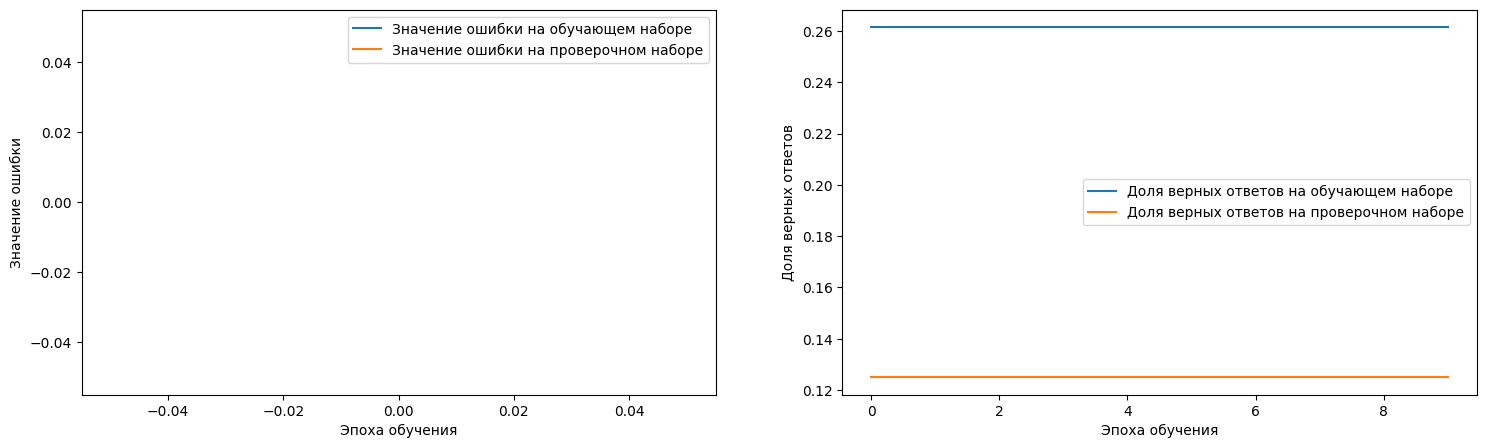

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

# **ВЫВОД:** вот получили точность на тестовой базе ????? (очень маленькая база картин по каждому художнику).

Надо загрузить количество картин по каждому художнику
* Репин от 1000-3000
* Кустодиев 700
* Кандинский 1500
* Левитан 945